In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from matplotlib import style
from symbols import load_ticker, save_ticker
from algorithm import calc_absolute_momentum


# disable pandas warning 
pd.options.mode.chained_assignment = None

# folders
TICKERS_FOLDER = '.\\data\\tickers'     # tickers folder
OUTPUT_FOLDER = '.\\data\\output'       # result folder 

In [2]:
action = 1      # how often do we evaluate and 'take' action
lookback = 253   # what is te lookback duration 
ticker = 'SPY'   # the ticker

# dates to back test
start_date = '1970-01-01'  
end_date = dt.datetime.now().strftime('%Y-%m-%d') 


In [3]:
# read from csv
df = load_ticker(ticker, start_date, end_date, TICKERS_FOLDER, False)
print(df)


High         Low        Open       Close       Volume  \
Date                                                                      
1993-01-29   43.968750   43.750000   43.968750   43.937500    1003200.0   
1993-02-01   44.250000   43.968750   43.968750   44.250000     480500.0   
1993-02-02   44.375000   44.125000   44.218750   44.343750     201300.0   
1993-02-03   44.843750   44.375000   44.406250   44.812500     529400.0   
1993-02-04   45.093750   44.468750   44.968750   45.000000     531500.0   
...                ...         ...         ...         ...          ...   
2020-06-12  309.079987  298.600006  308.239990  304.209991  194529100.0   
2020-06-15  308.279999  296.739990  298.019989  307.049988  135782700.0   
2020-06-16  315.640015  307.670013  315.480011  312.959991  137627500.0   
2020-06-17  314.390015  310.859985  314.070007  311.660004   82954600.0   
2020-06-18  312.299988  309.510010  310.010010  311.779999   80443900.0   

             Adj Close  
Date             

In [4]:
df_res = calc_absolute_momentum(df, 1, 253)
print(df_res)


Close  Daily return  lookback window Abs Close RISK
Date                                                                
1993-01-29   26.299288           NaN              NaN               
1993-02-01   26.486324      0.007112              NaN               
1993-02-02   26.542448      0.002119              NaN               
1993-02-03   26.822998      0.010570              NaN               
1993-02-04   26.935240      0.004185              NaN               
...                ...           ...              ...       ...  ...
2020-06-12  304.209991      0.011976         0.076410               
2020-06-15  307.049988      0.009336         0.081994               
2020-06-16  312.959991      0.019248         0.104040               
2020-06-17  311.660004     -0.004154         0.099036               
2020-06-18  311.779999      0.000385         0.088066               

[6897 rows x 5 columns]
start algo run from 253 until 6897
still running - 261
still running - 271
still running - 281


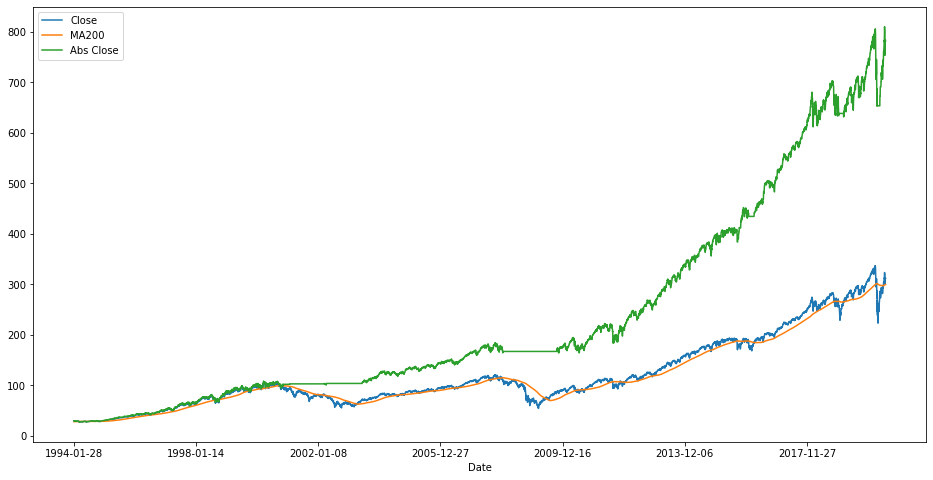

In [5]:
df_res['MA200'] = df_res['Close'].rolling(200).mean()

df_res.dropna()[['Close', 'MA200', 'Abs Close']].plot(label=ticker, figsize=(16,8))
#df_res['Abs Close'].plot(label=ticker, figsize=(16,8))

In [6]:

df1 = pd.read_csv('.\\data\output\SPY_ABS_a1_lb253.csv')
df1.set_index("Date", inplace=True)
df1

,Close,Daily return,lookback window,Abs Close,RISK
Date,,,,,
1995-01-03,28.841124,NaN,NaN,NaN,NaN
1995-01-04,28.978922,0.004778,NaN,NaN,NaN
1995-01-05,28.978922,0.000000,NaN,NaN,NaN
1995-01-06,29.008436,0.001018,NaN,NaN,NaN
1995-01-09,29.038006,0.001019,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-12,304.209991,0.011976,0.076410,745.246922,RISK ON
2020-06-15,307.049988,0.009336,0.081994,752.204282,RISK ON
2020-06-16,312.959991,0.019248,0.104040,766.682478,RISK ON


In [7]:
df2 = df1.dropna()
df2

,Close,Daily return,lookback window,Abs Close,RISK
Date,,,,,
1996-01-03,40.158329,0.002766,0.392398,40.158329,RISK ON
1996-01-04,39.775673,-0.009529,0.372573,39.775673,RISK ON
1996-01-05,39.695103,-0.002026,0.369792,39.695103,RISK ON
1996-01-08,39.846169,0.003806,0.373606,39.846169,RISK ON
1996-01-09,39.161423,-0.017185,0.348626,39.161423,RISK ON
...,...,...,...,...,...
2020-06-12,304.209991,0.011976,0.076410,745.246922,RISK ON
2020-06-15,307.049988,0.009336,0.081994,752.204282,RISK ON
2020-06-16,312.959991,0.019248,0.104040,766.682478,RISK ON


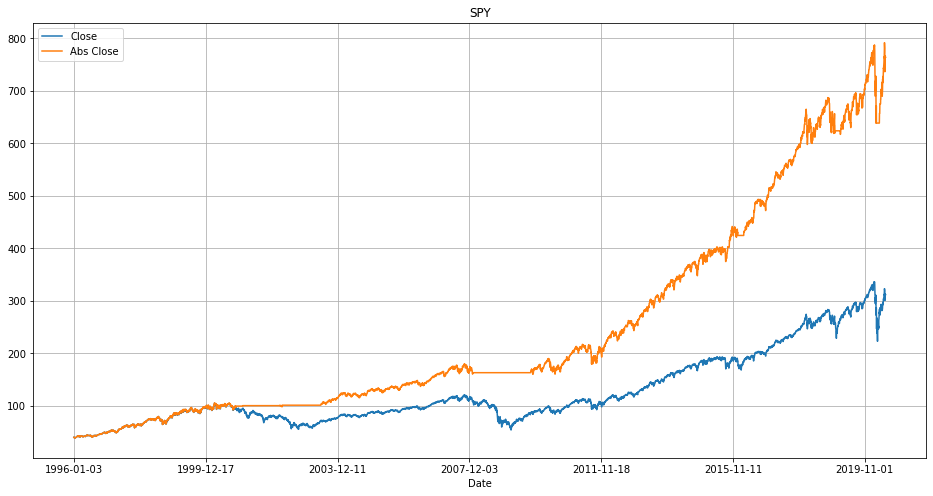

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (16,8)
df2[['Close', 'Abs Close']].plot(grid=True, legend=2, title='SPY')
